In [14]:
import ipywidgets
print(ipywidgets.__version__)

8.1.5


# Interactive Data Exploration with Jupyter Widgets

## Introduction

This notebook demonstrates the power of **Jupyter widgets** for creating interactive data exploration experiences. Widgets allow us to build dynamic interfaces directly within Jupyter notebooks, making data analysis more engaging and intuitive.

### Learning Objectives

By the end of this notebook, you will understand:
- How to use `ipywidgets` for interactive data filtering
- Creating interactive visualizations with `@interact` decorator
- Building custom widget interfaces for data exploration
- Combining widgets with pandas for dynamic data analysis
- Best practices for interactive notebook design

### Prerequisites
- Basic understanding of pandas and matplotlib
- Familiarity with Jupyter notebooks
- Basic Python programming concepts

---

## Why Use Interactive Widgets?

Interactive widgets provide several advantages:
1. **Immediate Feedback**: See results change in real-time as you modify parameters
2. **Enhanced Exploration**: Easily test different scenarios without rewriting code
3. **Better Communication**: Make presentations and demos more engaging
4. **Reduced Code Repetition**: One function can handle multiple parameter combinations

---
author: Nipun Batra
badges: true
categories:
- Data Science
- Interactive Computing
- Data Visualization
- Python
date: '2025-01-13'
description: Interactive data exploration and visualization using Jupyter widgets with pandas and matplotlib
keywords: jupyter widgets, interactive computing, data filtering, visualization, pandas, matplotlib, ipywidgets
title: Interactive Data Exploration with Jupyter Widgets
toc: true
---

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import clear_output
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Setup and Data Preparation

Let's start by importing the necessary libraries and creating a sample student dataset for our interactive exploration.

In [16]:
names = [
    'Aarav', 'Aditi', 'Arjun', 'Ananya', 'Dhruv', 'Diya', 
    'Ishaan', 'Isha', 'Krishna', 'Kavya', 'Mira', 'Mihir',
    'Neha', 'Nikhil', 'Priya', 'Pranav', 'Riya', 'Rohan'
]

df = pd.DataFrame({
    'Name': names,
    'Age': np.random.randint(18, 23, len(names)),
    'Grade': np.random.randint(65, 100, len(names)),
    'Subject': np.random.choice(['Math', 'Physics', 'Chemistry'], len(names))
})

### Creating Sample Student Data

We'll create a realistic student dataset with multiple attributes to demonstrate various filtering capabilities.

In [17]:
display(df)

,Name,Age,Grade,Subject
0,Aarav,20,69,Chemistry
1,Aditi,21,68,Physics
2,Arjun,19,72,Physics
3,Ananya,21,65,Chemistry
4,Dhruv,20,75,Physics
5,Diya,21,88,Physics
6,Ishaan,22,84,Math
7,Isha,18,99,Math
8,Krishna,19,77,Chemistry
9,Kavya,21,87,Physics


In [18]:
print("\nBasic Subsetting Examples:")
print("\nMath Students:")
math_students = df.query('Subject == "Math"')
math_students


Basic Subsetting Examples:

Math Students:


,Name,Age,Grade,Subject
6,Ishaan,22,84,Math
7,Isha,18,99,Math
12,Neha,18,66,Math
15,Pranav,20,99,Math
16,Riya,18,84,Math


## Basic Data Filtering Examples

Before diving into interactive widgets, let's see some traditional filtering approaches to understand what we're trying to make interactive.

In [19]:
print("\nHigh Performers (Grade > 85):")
high_performers = df.query("Grade > 85")
display(high_performers)


High Performers (Grade > 85):


,Name,Age,Grade,Subject
5,Diya,21,88,Physics
7,Isha,18,99,Math
9,Kavya,21,87,Physics
14,Priya,22,89,Physics
15,Pranav,20,99,Math


In [20]:
@interact
def filter_by_subject(subject=['All'] + list(df['Subject'].unique())):
    print(f"Showing {subject} students")
    """Simple filtering using @interact"""
    if subject == 'All':
        return df
    return df.query('Subject == @subject')

interactive(children=(Dropdown(description='subject', options=('All', 'Chemistry', 'Physics', 'Math'), value='...

## Simple Interactive Filtering with @interact

The `@interact` decorator is the simplest way to create interactive widgets. It automatically generates appropriate widgets based on the function parameters.

In [21]:
def filter_students(subject='All', min_grade=0):
    """More controlled filtering using interactive"""
    print(f"Showing {subject} students with grade >= {min_grade:0.1f}")
    filtered = df if subject == 'All' else df.query('Subject == @subject')
    out = filtered.query('Grade >= @min_grade')
    return out

In [22]:
filter_students()

Showing All students with grade >= 0.0


,Name,Age,Grade,Subject
0,Aarav,20,69,Chemistry
1,Aditi,21,68,Physics
2,Arjun,19,72,Physics
3,Ananya,21,65,Chemistry
4,Dhruv,20,75,Physics
5,Diya,21,88,Physics
6,Ishaan,22,84,Math
7,Isha,18,99,Math
8,Krishna,19,77,Chemistry
9,Kavya,21,87,Physics


In [10]:
student_filter_viz = interact(
    filter_students,
    subject = ['All'] + list(df['Subject'].unique()),
    min_grade=(0.0, 99.5, 5.0)
)

interactive(children=(Dropdown(description='subject', options=('All', 'Physics', 'Math', 'Chemistry'), value='...

## Advanced Interactive Filtering

Now let's create a more sophisticated interface with multiple filter criteria. Notice how we can combine different widget types for a richer user experience.


Basic Plot (Direct Function Call):


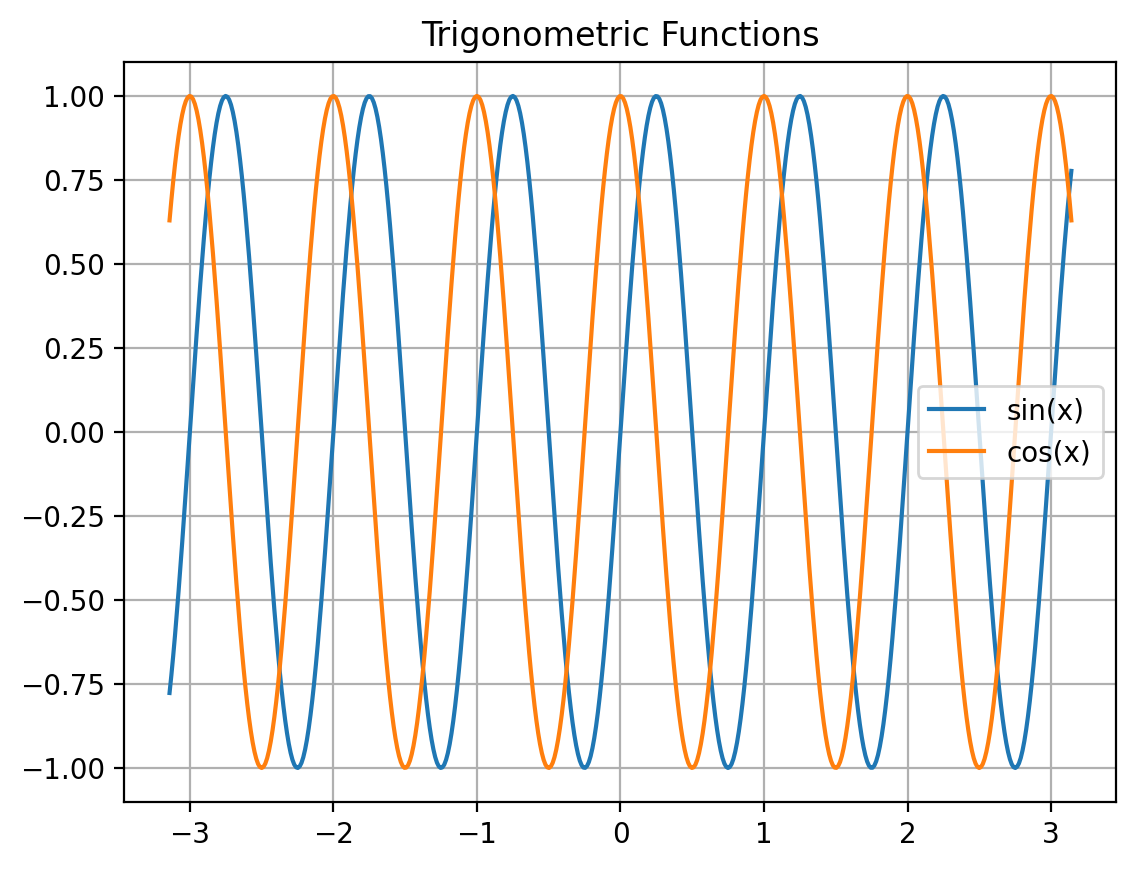

In [23]:
def plot_wave(freq=1):
    """Basic plotting function"""
    x = np.linspace(-1*np.pi, 1*np.pi, 500)
    
    plt.plot(x, np.sin(np.pi*2*freq*x), label='sin(x)')
    plt.plot(x, np.cos(np.pi*2*freq*x), label='cos(x)')
    plt.grid(True)
    plt.legend()
    plt.title('Trigonometric Functions')
    plt.show()

print("\nBasic Plot (Direct Function Call):")
plot_wave()

## Interactive Data Visualization

Widgets aren't just for filtering data - they're also powerful for creating interactive visualizations. Let's explore mathematical functions with interactive parameters.

In [12]:
print("\nPlotting with @interact:")

@interact
def plot_wave_interact(freq=(1, 5, 1)):
    """Simple interactive plotting with @interact"""
    plot_wave(freq)



Plotting with @interact:


interactive(children=(IntSlider(value=3, description='freq', max=5, min=1), Output()), _dom_classes=('widget-i...

### Simple Interactive Plotting

The `@interact` decorator makes it easy to create interactive plots with minimal code.

In [24]:
def plot_wave_advanced(func_type='sine', frequency=1, color='blue', show_grid=True):
    """Advanced plotting with more control"""
    fig, ax = plt.subplots(figsize=(6, 4))
    
    num_points = 1000
    
    x = np.linspace(-2 * np.pi, 2 * np.pi, num_points)
    
    if func_type == 'sine':
        y = np.sin(2 * np.pi * frequency * x)
        title = 'Sine Wave'
    elif func_type == 'cosine':
        y = np.cos(2 * np.pi * frequency * x)
        title = 'Cosine Wave'
    
    plt.plot(x, y, color=color, label=func_type)
    plt.title(title)
    plt.legend()
    plt.grid(show_grid)
    
    plt.show()

# Create the interact widget and store it in plot_viz
plot_viz = interact(
    plot_wave_advanced,
    func_type=widgets.RadioButtons(
        options=['sine', 'cosine'],
        description='Function:',
        style={'description_width': 'initial'},
        layout={'width': '200px'}
    ),
    frequency=widgets.FloatSlider(
        value=1,
        min=0.1,
        max=5,
        step=0.1,
        description='Frequency:',
        style={'description_width': 'initial'},
        layout={'width': '300px'}
    ),
    color=widgets.Dropdown(
        options=['blue', 'red', 'green', 'purple'],
        value='blue',
        description='Color:',
        style={'description_width': 'initial'},
        layout={'width': '200px'}
    ),
    show_grid=widgets.Checkbox(
        value=True,
        description='Show Grid',
        style={'description_width': 'initial'}
    )
)

interactive(children=(RadioButtons(description='Function:', layout=Layout(width='200px'), options=('sine', 'co...

## Advanced Widget Customization

For more control over the interface, we can explicitly define widget types and their properties. This gives us fine-grained control over the user experience.

## Key Takeaways and Best Practices

### What We've Learned

1. **Simple Interactivity**: The `@interact` decorator provides quick interactive capabilities
2. **Custom Widgets**: Explicit widget definitions offer more control over user interface
3. **Real-time Updates**: Widgets provide immediate feedback for data exploration
4. **Multiple Widget Types**: Different widgets (sliders, dropdowns, checkboxes) serve different purposes

### Best Practices for Interactive Widgets

1. **Start Simple**: Begin with `@interact` and add complexity as needed
2. **Meaningful Parameters**: Choose parameters that significantly affect results
3. **Reasonable Ranges**: Set appropriate min/max values for sliders
4. **Clear Labels**: Use descriptive names for widget labels
5. **Performance**: Be mindful of computational cost for real-time updates

### Common Widget Types

- **IntSlider/FloatSlider**: For numeric ranges
- **Dropdown**: For categorical selections
- **RadioButtons**: For mutually exclusive choices  
- **Checkbox**: For boolean options
- **Text**: For string input

### Real-World Applications

Interactive widgets are valuable for:
- **Parameter Tuning**: Machine learning hyperparameter optimization
- **Data Exploration**: Quick filtering and subsetting of datasets
- **Educational Content**: Teaching concepts with interactive examples
- **Dashboards**: Creating simple analytical interfaces
- **Prototyping**: Rapid development of interactive tools

### Next Steps

To extend your widget skills:
1. Explore advanced layout options with `HBox` and `VBox`
2. Learn about widget events and callbacks
3. Investigate integration with other visualization libraries (Plotly, Bokeh)
4. Consider building full dashboard applications with Voila